# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
lr_rate = [1e-1, 1e-3]
b_size  = 256
epo     = 50

opts = {'SGD'    : keras.optimizers.SGD(nesterov=True, momentum=0.95),
        'RMSprop': keras.optimizers.RMSprop(rho=0.9),
        'Adagrad': keras.optimizers.Adagrad(),
        'Adam'   : keras.optimizers.Adam()}

op_name = ['SGD','RMSprop','Adagrad','Adam']
results = {}
for opt in op_name:
    for lr in lr_rate:
#         keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f %s " % (lr,opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        # model.summary()
        optimizer = opts.get(opt)
        optimizer.lr = lr
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        # model.summary()

        model.fit(x_train, y_train,
                  epochs=epo,
                  batch_size=b_size, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s-%s" % (str(lr),opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000 SGD 
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3330 - acc: 0.1074 - val_loss: 2.3028 - val_acc: 0.1001
Epoch 2/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.2095 - acc: 0.1383 - val_loss: 2.1092 - val_acc: 0.1620
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.0664 - acc: 0.1850 - val_loss: 2.0487 - val_acc: 0.1950
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9733 - acc: 0.2515 - val_loss: 1.8760 - val_acc: 0.3069
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8374 - acc: 0.3249 - val_loss: 1.8336 - val_acc: 0.3252
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7802 - acc: 0.3502 - val_loss: 1.7784 - val_acc: 0.3553
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7693 - acc: 

50000/50000 [==============================] - 3s 63us/step - loss: 1.4810 - acc: 0.4811 - val_loss: 1.5050 - val_acc: 0.4687
Epoch 10/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4561 - acc: 0.4902 - val_loss: 1.4817 - val_acc: 0.4764
Epoch 11/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4342 - acc: 0.4955 - val_loss: 1.4690 - val_acc: 0.4816
Epoch 12/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4113 - acc: 0.5045 - val_loss: 1.4655 - val_acc: 0.4813
Epoch 13/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3893 - acc: 0.5130 - val_loss: 1.4366 - val_acc: 0.4941
Epoch 14/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.3712 - acc: 0.5190 - val_loss: 1.4240 - val_acc: 0.4970
Epoch 15/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3502 - acc: 0.5251 - val_loss: 1.4212 - val_acc: 0.4984
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 3s 70us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 4s 70us/step - loss: 1.1579 - acc: 0.5840 - val_loss: 1.5793 - val_acc: 0.4610A: 2s - loss: 1.1492 - ac - ETA: 1s - 
Epoch 25/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1410 - acc: 0.5919 - val_loss: 1.4954 - val_acc: 0.4976
Epoch 26/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1196 - acc: 0.5980 - val_loss: 1.5037 - val_acc: 0.5006
Epoch 27/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1069 - acc: 0.6036 - val_loss: 1.6025 - val_acc: 0.46961s - los
Epoch 28/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.0889 - acc: 0.6099 - val_loss: 1.6084 - val_acc: 0.4924
Epoch 29/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.0629 - acc: 0.6192 - val_loss: 1.5013 - val_acc: 0.5015
Epoch 30/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.0500 - acc: 0.6243 - val_loss: 1.5711 - val_acc: 0.4746s

Epoch 32/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 67us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 67us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 67us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50

50000/50000 [==============================] - 3s 69us/step - loss: 1.3013 - acc: 0.5484 - val_loss: 1.4032 - val_acc: 0.5017
Epoch 41/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2967 - acc: 0.5496 - val_loss: 1.3903 - val_acc: 0.5070
Epoch 42/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2918 - acc: 0.5496 - val_loss: 1.3974 - val_acc: 0.5046loss: 1.2
Epoch 43/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2871 - acc: 0.5507 - val_loss: 1.3919 - val_acc: 0.5063
Epoch 44/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2839 - acc: 0.5547 - val_loss: 1.3803 - val_acc: 0.5102
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2791 - acc: 0.5558 - val_loss: 1.3950 - val_acc: 0.5080
Epoch 46/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2742 - acc: 0.5578 - val_loss: 1.4026 - val_acc: 0.4995
Epoch 47/50
50000/50000 [============

50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000 Adam 
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 84us/step - loss: 14.3404 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000a - ETA: 0s - los
Epoch 2/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step -

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_result(results):
    color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

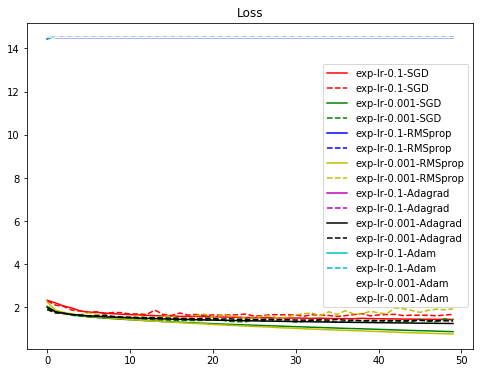

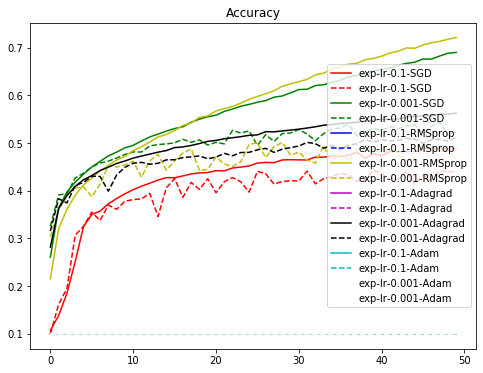

In [10]:
plot_result(results)